In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestRegressor
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

### Reading datasets
We are using "Seattle Airbnb Open Data" available on Kaggle for this Analysis

In [2]:
df_listing = pd.read_csv('../data/listings.csv') # Listing data

In [3]:
df_calendar = pd.read_csv('../data/calendar.csv') # Date wise listing info wrt price, availability

In [4]:
df_reviews = pd.read_csv('../data/reviews.csv') # listing-reviews data

In [5]:
# Quick look at few entries of listing data
df_listing.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [6]:
# Quick look at few entries of listing-daywise pricing,availability data
df_calendar.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [7]:
# Quick look at few entries of reviews data
df_reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


### Focus Questions to be answered from this Analysis
After looking at data as well as descriptions available on Kaggle ( https://www.kaggle.com/airbnb/seattle ) about this dataset, we can focus on answering following questions through this Analysis :

1. What is the trend wrt Availability of listing on Airbnb in different Neighbourhoods of Seattle ?
2. What is the trend wrt listing-prices on Airbnb in different Neighbourhoods of Seattle ? 
3. Do we see Seasonality as well as Day-of-week influencing Prices ?
4. Can we determine important factors which influence listing-price the most on Airbnb ?



### Q1 What is the trend wrt Availability of listing on Airbnb in different Neighborhoods of Seattle ?

Text(0.5, 1.0, 'Listings count : Neighborhood wise')

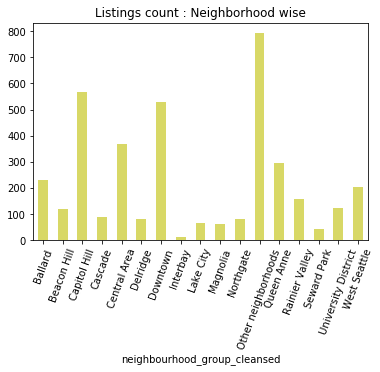

In [8]:
# Listing availability wrt "neighbourhood_group_cleansed"
df_listing.groupby(df_listing.neighbourhood_group_cleansed).count()['id']\
                        .plot(kind='bar',rot=70,alpha=0.6,color='y')
plt.title("Listings count : Neighborhood wise")

Text(0.5, 1.0, 'Top 20 neighborhoods with maximum listings ')

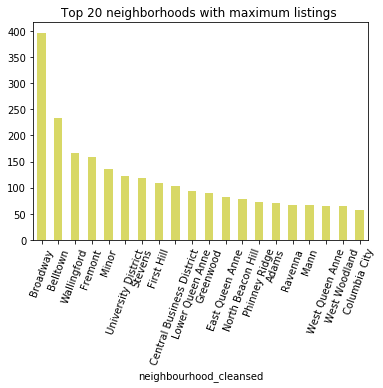

In [9]:
# Looking at top 20 neighborhoods with maximum listings 
df_listing.groupby(df_listing.neighbourhood_cleansed).count().sort_values(by='id',ascending=False).head(20)['id']\
                        .plot(kind='bar',rot=70,alpha=0.6,color='y')
plt.title("Top 20 neighborhoods with maximum listings ")

Text(0.5, 1.0, 'First 20 neighbourhoods with minimum listings')

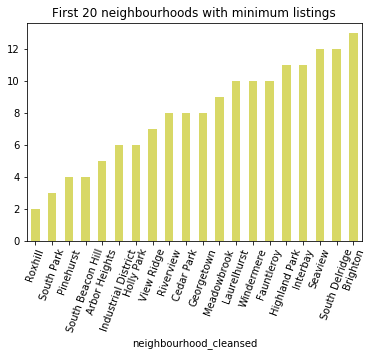

In [10]:
# Looking at First 20 neighbourhoods with minimum listings 
df_listing.groupby(df_listing.neighbourhood_cleansed).count().sort_values(by='id',ascending=True).head(20)['id']\
                        .plot(kind='bar',rot=70,alpha=0.6,color='y')
plt.title("First 20 neighbourhoods with minimum listings")

### Q2 What is the trend wrt listing-prices on Airbnb in different Neighbourhoods of Seattle ? 

In [11]:
df_listing.price.head(3)

0     $85.00
1    $150.00
2    $975.00
Name: price, dtype: object

In [12]:
df_listing['price'].dtype

dtype('O')

In [13]:
# since "Price" column is non-numeric, we need to first clean it and convert to "numeric" type
df_listing['price'] = df_listing['price'].astype(str).str.replace("[$, ]", "").astype("float")

In [14]:
# Basic stats for "price" attribute
df_listing['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Diribution of listing-prices of Seattle airbnb listings')

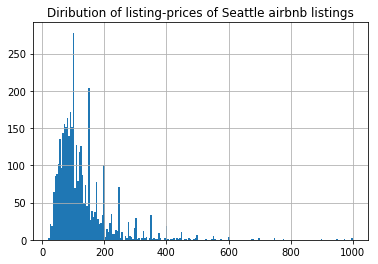

In [15]:
#Distribution of "Pricing" value
df_listing['price'].hist(bins=200)
plt.title("Diribution of listing-prices of Seattle airbnb listings")

Text(0.5, 1.0, 'Avg listing-price trends across neighborhood-groups')

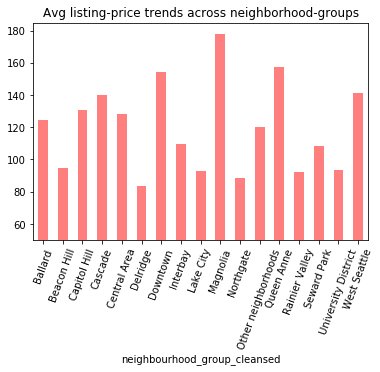

In [16]:
# Avg listing-price trends across "neighbourhood_groups"
df_listing.groupby(df_listing.neighbourhood_group_cleansed).mean()['price']\
                        .plot(kind='bar',rot=70,alpha=0.5,color='r',ylim=[50,185])

plt.title("Avg listing-price trends across neighborhood-groups")

Text(0.5, 1.0, 'Top 20 neighbourhoods with higest avg-listing-price')

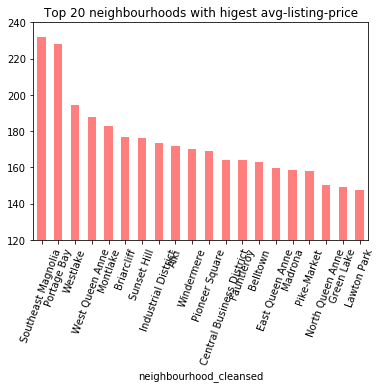

In [17]:
# Top 20 neighbourhoods with higest avg listing_price
df_listing.groupby(df_listing.neighbourhood_cleansed).mean().sort_values(by='price',ascending=False).head(20)['price']\
                        .plot(kind='bar',rot=70,alpha=0.5,color='r',ylim=[120,240])

plt.title("Top 20 neighbourhoods with higest avg-listing-price")



Text(0.5, 1.0, 'First 20 neighborhoods with minimum avg-listings-price')

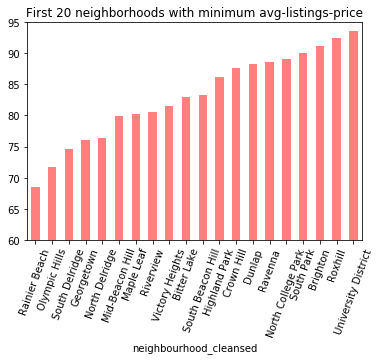

In [18]:
# First 20 neighbourhoods with minimum avg listings_price
df_listing.groupby(df_listing.neighbourhood_cleansed).mean().sort_values(by='price',ascending=True).head(20)['price']\
                        .plot(kind='bar',rot=70,alpha=0.5,color='r',ylim=[60,95])

plt.title("First 20 neighborhoods with minimum avg-listings-price")


### Q3 Do we see Seasnality as well as Day-of-week influencing Prices ?

In [19]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [20]:
# since Price and date are non-numeric , we need to convert it to correct data types
df_calendar['price'] = df_calendar['price'].astype(str).str.replace("[$, ]", "").astype("float")
df_calendar.loc[:,'date'] = pd.to_datetime(df_calendar['date'])

In [21]:
df_calendar.isnull().sum().sum()

459028

In [22]:
df_calendar1 = df_calendar

In [23]:
# creating additional columns for "month" and "day_name"
df_calendar1['month'], df_calendar1['day_name'] = (df_calendar1['date'].apply(lambda x: x.month),
                                                   df_calendar1['date'].apply(lambda x: x.strftime("%A")))

Text(0.5, 1.0, 'Month wise variation in avg-listings-prices')

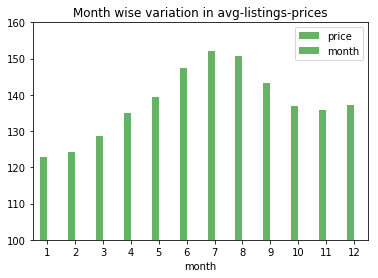

In [24]:
#PLotting month wise variation in avg_prices
df_calendar1.groupby(df_calendar1.month).mean().drop(['listing_id'],axis=1)\
                                        .plot(rot=0,kind='bar',use_index=True,ylim=[100,160],alpha=0.6,color='g')

plt.title("Month wise variation in avg-listings-prices")

Text(0.5, 1.0, 'Weekday wise variation in avg-listings-prices')

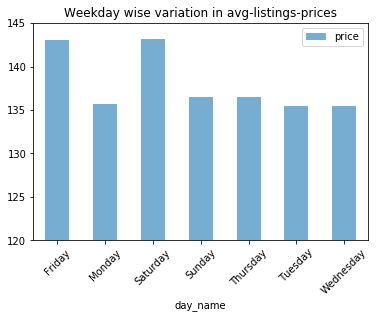

In [25]:
# plotting weekday wise variation in avg_prices
df_calendar1.groupby(df_calendar1.day_name).mean().drop(['listing_id','month'],axis=1)\
                                                  .plot(rot=45,kind='bar',use_index=True,ylim=[120,145],alpha=0.6)

plt.title("Weekday wise variation in avg-listings-prices")

### Looking at seasonality trends , we clearly see a strong trend that:
##### Prices increase in summer season ( June-Aug ) as well as 
##### Prices for weekend days ( Friday, Saturday ) are also noticeably higher than prices on rest of days

### Q4 Building  model to predict prices as well as to understand key components which influence prices
We will evaluate if we can build a Regression model to predict listing_prices by using features available in df_listing dataset

In [26]:
# looking at features available in df_listing
df_listing.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

In [27]:
# considering features availble we consider following attributes for further exploration
df_listing_shrtlst = df_listing[["host_response_rate", "host_acceptance_rate", "host_is_superhost",
               "host_listings_count", "zipcode", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price", "number_of_reviews", "review_scores_rating", "cancellation_policy", 
               "reviews_per_month"]]

In [28]:
#Checking for null values present in data
df_listing_shrtlst.isnull().sum()

host_response_rate      523
host_acceptance_rate    773
host_is_superhost         2
host_listings_count       2
zipcode                   7
property_type             1
room_type                 0
accommodates              0
bathrooms                16
bedrooms                  6
beds                      1
price                     0
number_of_reviews         0
review_scores_rating    647
cancellation_policy       0
reviews_per_month       627
dtype: int64

In [29]:
#for further analysis, we will considering entries with only non-null values
df_listing_shrtlst = df_listing_shrtlst.dropna(axis=0)

In [30]:
# For Features which ideally need to have "numeric" data types but have "non-numeric" dtype 
#         : converting them to correct dtype
df_listing_shrtlst['host_response_rate'] = df_listing_shrtlst['host_response_rate'].astype(str)
df_listing_shrtlst['host_acceptance_rate'] = df_listing_shrtlst['host_acceptance_rate'].astype(str)

df_listing_shrtlst['host_acceptance_rate'] = df_listing_shrtlst['host_acceptance_rate'].str.replace("%", "").astype("float")
df_listing_shrtlst['host_response_rate'] = df_listing_shrtlst['host_response_rate'].str.replace("%", "").astype("float")

df_listing_shrtlst['superhost']=np.where(df_listing_shrtlst['host_is_superhost']=='t',1,0)
del df_listing_shrtlst['host_is_superhost'] # deleting since we have created another feature "superhost"


In [31]:
# Looking at non-numeric features
df_listing_shrtlst.select_dtypes(include=['object']).columns

Index(['zipcode', 'property_type', 'room_type', 'cancellation_policy'], dtype='object')

In [32]:
# using One-Hot-Encoder, converting "non-numeric" features to "numeric" features
df_listing_shrtlst_encode = pd.get_dummies(df_listing_shrtlst)

In [33]:
df_listing_shrtlst_encode.head(2)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,96.0,100.0,3.0,4,1.0,1.0,1.0,85.0,207,95.0,...,0,0,0,0,1,0,0,0,1,0
1,98.0,100.0,6.0,4,1.0,1.0,1.0,150.0,43,96.0,...,0,0,0,0,1,0,0,0,0,1


In [34]:
#prepare train and test datasets for modelling

X = df_listing_shrtlst_encode.drop(columns = 'price')
y = df_listing_shrtlst_encode['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [35]:
#training and evaluating Random Forest regressor model
mod_rf = RandomForestRegressor(n_estimators=100, 
                               criterion='mse',
                               n_jobs=-1)
mod_rf.fit(X_train, y_train)

#calculate scores for the model
y_train_preds = mod_rf.predict(X_train)
y_test_preds = mod_rf.predict(X_test)

print('train MSE: %.1f, test MSE: %.1f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))

print('train R^2 : %.2f, test R^2 : %.2f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

train MSE: 357.5, test MSE: 2370.8
train R^2 : 0.95, test R^2 : 0.64


#### Test R^2 of 0.64 with just initial iteration seems encouraging 
#### and as a future scope, we can aim for a definite improvement in model performance 

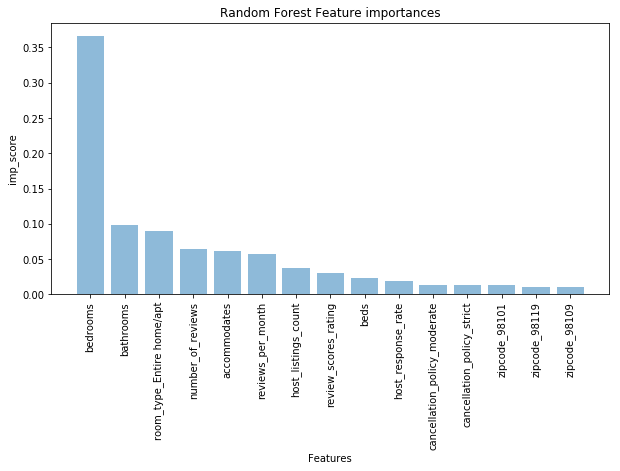

In [36]:
#get feature importances from RF model
headers = ["feature", "imp_score"]
values = sorted(zip(X_train.columns, mod_rf.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['imp_score'], ascending = False)

features = forest_feature_importances['feature'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['imp_score'][:15]

#plotting feature importances
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('imp_score')
plt.xlabel('Features')
plt.title('Random Forest Feature importances')

plt.show()

#### With RF model, following 4 come out to be most imp features in predicting listing-prices
1. bedrooms
2. room_type
3. bathrooms
4. number_of_reviews

In [37]:
#training and evaluating XGboost regressor model
mod_xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
mod_xgb.fit(X_train,y_train)

y_train_preds = mod_xgb.predict(X_train)
y_test_preds = mod_xgb.predict(X_test)

print('train MSE : %.1f, test MSE: %.1f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('train R^2: %.2f, test R^2: %.2f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


train MSE : 380.1, test MSE: 2234.6
train R^2: 0.94, test R^2: 0.66


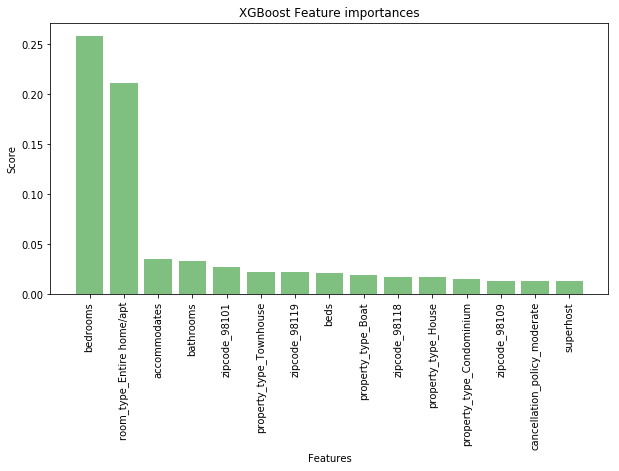

In [38]:
#get feature importances from the model
headers = ["feature", "imp_score"]
values = sorted(zip(X_train.columns, mod_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances for top 15 features
features = xgb_feature_importances['feature'][:15]
y_pos = np.arange(len(features))
scores = xgb_feature_importances['imp_score'][:15]
 
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5,color='g')
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('XGBoost Feature importances')
 
plt.show()

#### With XGBoost model, following 4 come out to be most imp features in predicting listing-prices
1. bedrooms
2. room_type
3. accomodates
4. bathrooms

We also see quite a few features common between RF and XGboost in top10 

### Looking at results of Random Forest as well as XGBoost regression models, we can conclude that:
#### There is a scope to build model to predict listing_prices with acceptable accuracy and
#### There only few features which are more critical in influecing listing-prices than rest of features